In [348]:
import numpy as np
import pandas as pd



df_data = pd.read_csv('dataus2023.csv')

df_data.shape

df_data.head(20)

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,currentassets,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.332411,104.000000,452000.000,NaN,2000
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,5057000.0,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.750000,452271.967,1453000.0,2000
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,5344000.0,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.937500,453014.579,1581000.0,2000
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,5655000.0,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.750000,456366.381,1741000.0,2000
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,5461000.0,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.730000,456769.737,1821000.0,2001
5,A,2001q2,6.0,4930000.0,2683000.0,2025000.0,277000.0,-14000.0,0.0,235000.0,...,4998000.0,1791000.0,3464000.0,3098000.0,0.0,19.791378,32.500000,457072.749,1848000.0,2001
6,A,2001q3,9.0,6736000.0,3829000.0,3027000.0,312000.0,-19000.0,0.0,142000.0,...,4656000.0,1704000.0,3135000.0,2804000.0,0.0,11.905275,19.549999,460637.309,1807000.0,2001
7,A,2001q4,12.0,8396000.0,5166000.0,4008000.0,301000.0,580000.0,0.0,-71000.0,...,4799000.0,1491000.0,2327000.0,2002000.0,0.0,17.361606,28.510000,463695.160,1848000.0,2001
8,A,2002q1,3.0,1426000.0,878000.0,990000.0,19000.0,2000.0,0.0,-106000.0,...,5467000.0,1382000.0,3163000.0,1660000.0,1150000.0,21.289433,34.959999,463859.978,1787000.0,2002
9,A,2002q2,6.0,2883000.0,1732000.0,1942000.0,41000.0,-4000.0,0.0,-186000.0,...,5260000.0,1307000.0,3110000.0,1609000.0,1150000.0,14.402034,23.650000,464247.548,1728000.0,2002


In [349]:
df_data['qdate'] = pd.PeriodIndex(df_data.q,freq="q")
df_data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,inventory,totalliabilities,currentliabilities,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.332411,104.0000,452000.000,NaN,2000,2000Q1
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,1622000.0,2679000.0,2186000.0,0.0,44.911205,73.7500,452271.967,1453000.0,2000,2000Q2
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,1762000.0,2925000.0,2510000.0,0.0,29.801249,48.9375,453014.579,1581000.0,2000,2000Q3
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,1853000.0,3160000.0,2758000.0,0.0,33.340861,54.7500,456366.381,1741000.0,2000,2000Q4
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,2129000.0,3667000.0,3070000.0,0.0,18.713509,30.7300,456769.737,1821000.0,2001,2001Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.780000,2.7800,104098.538,NaN,2022,2022Q3
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.430000,2.4300,104098.538,NaN,2022,2022Q4
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q1
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,104098.538,NaN,2023,2023Q2


In [350]:
df_firms = pd.read_csv('firmsus2023.csv')

df_firms.shape

df_firms.head()

,empresa,Nombre,status,partind,naics1,naics2,SectorEconomatica
0,A,"Agilent Technologies, Inc",activo,0.1,Industrias manufactureras,"Fabricación de instrumentos de medición, contr...",Electroelectronic
1,AA,Alcoa Corp,activo,NaN,Industrias manufactureras,Industria básica del aluminio,Siderur & Metalur
2,AABA_old,Altaba Inc,cancelado,NaN,"Servicios profesionales, científicos y técnicos",Servicios de diseño de sistemas de cómputo y s...,Software y Datos
3,AAC_old,Aac Hldg Inc,cancelado,NaN,Servicios de salud y de asistencia social,Otros consultorios para el cuidado de la salud,Otros
4,AAIC,Arlington Asset Investment Corp,activo,NaN,Servicios financieros y de seguros,Otros fondos,Fondos


In [351]:
df_firms1 = df_firms[["empresa","Nombre","status","naics1"]]
df_firms1.columns= ["firm","Nombre","status","industria"]

df_firms1
data = pd.merge(df_data, df_firms1, on="firm", how = "left")

data

,firm,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,...,longdebt,adjprice,originalprice,sharesoutstanding,fixedassets,year,qdate,Nombre,status,industria
0,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63.332411,104.0000,452000.000,NaN,2000,2000Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
1,A,2000q2,6.0,4731000.0,2421000.0,1925000.0,73000.0,0.0,0.0,161000.0,...,0.0,44.911205,73.7500,452271.967,1453000.0,2000,2000Q2,"Agilent Technologies, Inc",activo,Industrias manufactureras
2,A,2000q3,9.0,7401000.0,3790000.0,3016000.0,101000.0,0.0,0.0,244000.0,...,0.0,29.801249,48.9375,453014.579,1581000.0,2000,2000Q3,"Agilent Technologies, Inc",activo,Industrias manufactureras
3,A,2000q4,12.0,10773000.0,5522000.0,4198000.0,111000.0,0.0,0.0,407000.0,...,0.0,33.340861,54.7500,456366.381,1741000.0,2000,2000Q4,"Agilent Technologies, Inc",activo,Industrias manufactureras
4,A,2001q1,3.0,2841000.0,1449000.0,1113000.0,19000.0,-25000.0,0.0,119000.0,...,0.0,18.713509,30.7300,456769.737,1821000.0,2001,2001Q1,"Agilent Technologies, Inc",activo,Industrias manufactureras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533083,ZY_old,2022q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.780000,2.7800,104098.538,NaN,2022,2022Q3,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533084,ZY_old,2022q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.430000,2.4300,104098.538,NaN,2022,2022Q4,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533085,ZY_old,2023q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104098.538,NaN,2023,2023Q1,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"
533086,ZY_old,2023q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104098.538,NaN,2023,2023Q2,Zymergen Inc,cancelado,"Servicios profesionales, científicos y técnicos"


In [352]:
data.set_index(['firm','qdate'],inplace = True)

#data

In [353]:
#Calculate log quarterly returns (rq) and log annual returns (ry).


data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

### 1.2 FIRM COMPOSITION OF THE US FINANCIAL MARKET

#### Show how many active firms by industry there are in the sample

In [419]:
industry_des['firma']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['firm']].count()

industry_des[['firma']]

,firma
industria,
-,190
"Agricultura, ganadería, aprovechamiento forestal, pesca y caza",1615
Comercio al por mayor,7505
Comercio al por menor,13775
Construcción,4370
"Empresas de electricidad, gas y agua",7315
Industrias manufactureras,146280
Información en medios masivos,24320
"Minería, explotación de canteras y extracción de petróleo y gas",10735


#### For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed? You have to do the right descriptive statistics

PARA ESTE ANÁLISIS PRIMERO HAY QUE CONSIDERAR QUE ESTAMOS ANALIZANDO VALORES DE FIRMAS COMPLETAMENTE DISTINTAS, LAS CUALES TIENEN VALORES MUY DISPERSOS. ES POR ESO QUE DECIDÍ VISUALIZAR TANTO LA MEDIA COMO LA MEDIANA PARA VER SI DIFIEREN MUCHO. 

OBTUVE LOS VALORES AGRUPANDO LOS DATOS POR INDUSTRIA PARA TENER UNA MEJOR COMPARACIÓN DE QUÉ INDUSTRIAS TIENEN MAYOR MARKET VALUE Y BOOK VALUE. SE OBTUVIERON  TODOS LOS CÁLCULOS DE MEDIA,MEDIANA Y DESVIACIÓN ESTÁNDAR. 

In [472]:
#Show how many active firms by industry there are in the sample

#Realizamos los calculos para la market value por industria

industry_des['std_mvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['mvalue']].std()
industry_des['mean_mvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['mvalue']].mean()
industry_des['median_mvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['mvalue']].median()
industry_des['std_mean_mvalue']= industry_des['std_mvalue']/industry_des['firma']

#Realizamos los calculos para  book value por industria

industry_des['std_bvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['bookvalue']].std()
industry_des['mean_bvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['bookvalue']].mean()
industry_des['std_mean_bvalue']= industry_des['std_bvalue']/industry_des['firma']


industry_des.describe()

,std_mvalue,mean_mvalue,firma,std_mean_mvalue,std_bvalue,mean_bvalue,std_mean_bvalue,median_mvalue,median_bvalue
count,1.900000e+01,1.900000e+01,19.000000,19.000000,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,2.966094e+07,8.977660e+06,17750.473684,3689.402015,7.391016e+06,2.823385e+06,1600.211151,2.111414e+06,9.893783e+05
std,3.060706e+07,5.431171e+06,34293.006393,4460.785551,6.709477e+06,1.719000e+06,2810.983301,1.162600e+06,1.273834e+06
min,6.865744e+05,1.914497e+06,190.000000,357.391767,7.559428e+05,5.220916e+05,75.123770,1.056445e+06,2.421830e+05
25%,7.089070e+06,4.125426e+06,3325.000000,1272.938523,2.292791e+06,1.333748e+06,389.293084,1.465716e+06,4.575170e+05
50%,1.650836e+07,8.806639e+06,6745.000000,2555.868721,5.086217e+06,2.805948e+06,572.431518,1.625907e+06,5.264850e+05
75%,4.639047e+07,1.154093e+07,12546.500000,3836.168470,1.072777e+07,3.930446e+06,959.591324,2.449458e+06,9.084245e+05
max,9.687076e+07,1.942287e+07,146280.000000,20118.133576,2.366443e+07,5.929914e+06,11197.457663,5.231092e+06,5.699397e+06


VAMOS A VISUALIZAR LOS RESULTADOS DE DICHOS CÁLCULOS CON UN PLOT. PRIMERO VAMOS COMPARAR LA MEDIA CON LA MEDIANA DEL MARKET VALUE POR INDUSTRIA

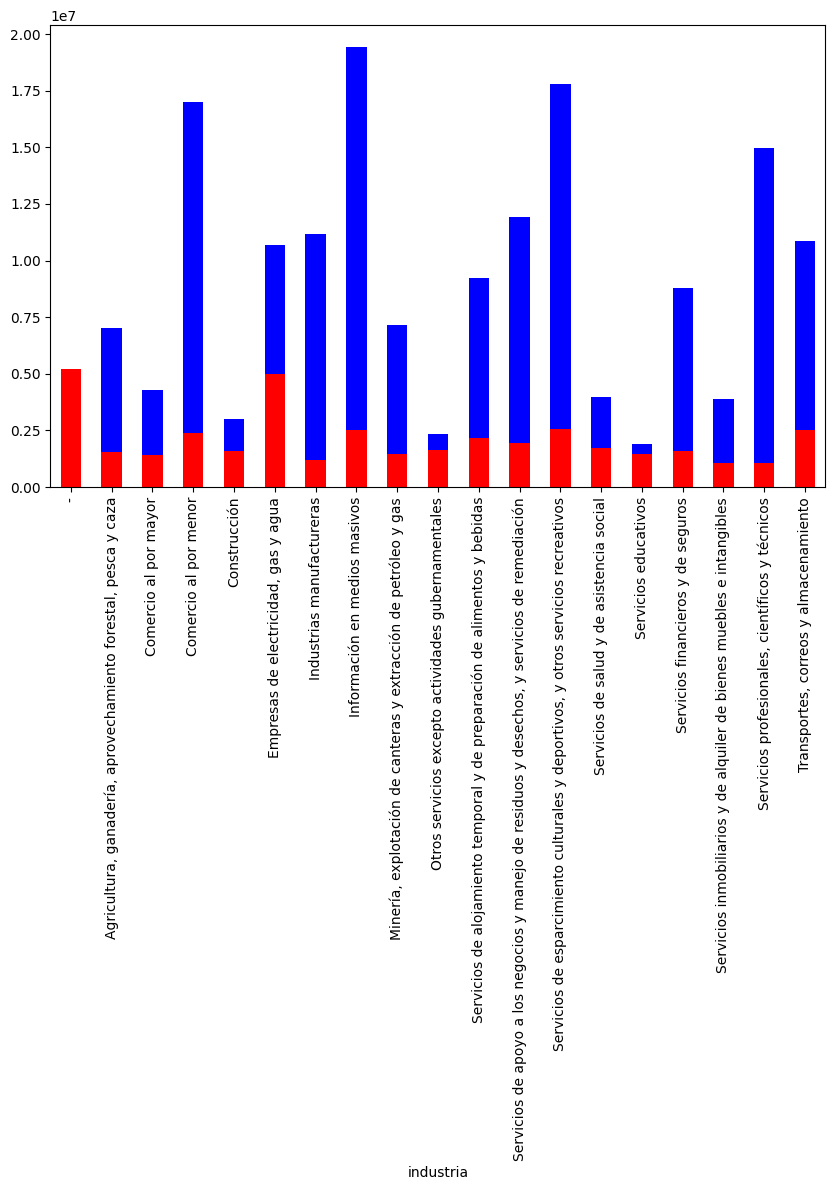

In [432]:
#REALIZAMOS UNA VISUALIZACION DE LA MEDIA Y MEDIANA DEL MARKET VALUE

plt.figure(figsize=(10, 6))
industry_des['mean_mvalue'].plot(kind='bar', color='blue')
industry_des['median_mvalue'].plot(kind='bar',color='red')
# Mostrar el gráfico
plt.show()


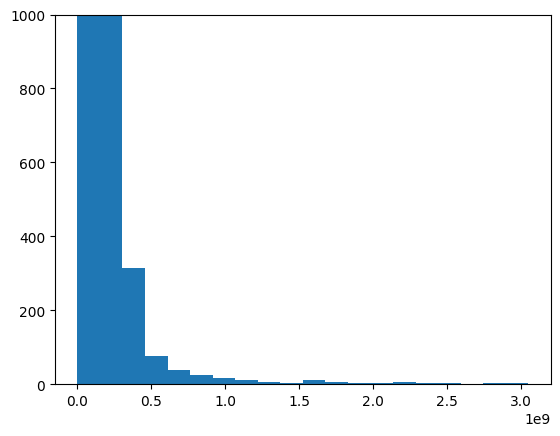

In [458]:
#HISTOGRAMA DEL MARKET VALUE

# REDUJE EL LIMITE EN Y PARA VER EL COMPORTAMIENTO MÁS CLARO Y VER LA TENENCIA A LA IZQUIERDA
plt.hist(data['mvalue'],bins=20)
plt.ylim(0,1000)
plt.show()

DESPUÉS DE ANALIZAR EL GRÁFICO PODEMOS OBSERVAR QUE LA MEDIA DIFIERE MUCHO DE LA MEDIANA, ESTO QUIERE DECIR QUE NO TIENE UNA DISTRIBUCIÓN NORMAL. DE IGUAL FORMA, AL REALIZAR UN HISTOGRAMA DE TODOS LOS VALORES DE MVALUE, PODEMOS VER QUE TIENE UNA TENDENCIA A LA IZQUIERDA, ESTO QUIERE DECIR QUE CASI TODAS LAS EMPRESAS TIENEN VALORES MUY BAJOS Y QUE SOLO MUY POCAS EMPRESAS TIENEN VALORES ALTOS.

ES POR ESTO QUE EL MEJOR PARÁMETRO PARA TOMAR EN CUENTA ES LA MEDIANA YA QUE AL SER TAN DIFERENTE LA MEDIA QUIERE DECIR QUE TIENE VALORES MUY EXTREMOS. UNA CONCLUSIÓN ES QUE DENTRO DE CADA INDUSTRIA EXISTEN EMPRESAS QUE TIENEN UN VALOR DE MERCADO MUY POR ENCIMA QUE OTRAS EMPRESAS Y QUE LA MEJOR FORMA DE REPRESENTAR EL VALOR TÍPICO DE LAS FIRMAS DE CADA INDUSTRIA ES LA MEDIANA.

ANALIZANDO LA MEDIANA DE LAS FIRMAS DE CADA INDUSTRIA PODEMOS DECIR QUE LAS FIRMAS DE LAS EMPRESAS DE ELECTRICIDAD, AGUA Y GAS TIENEN LOS VALORES TÍPICOS MAS ALTOS DE MARKET VALUE, CON UN VALOR APROXIMADO DE 15,625. Y LAS INDUSTRIA QUE MENOS VALOR TIENEN SON LA INDUSTRIA MANUFACTURERA, INMOBILIARIOS Y SERVICIOS PROFESIONALES.

LAS DEMÁS INDUSTRIAS TIENEN VALORES PARECIDOS, PARA VER CUAL ES EL VALOR TÍPICO DE TODAS LAS INDUSTRIAS SACAREMOS LA MEDIANA DE TODAS LAS FIRMAS Y TODAS LAS INDUSTRIAS DEL MARKET VALUE

In [434]:
median_global_mvalue = data['mvalue'].median()
print("mediana : ",media_global_mvalue)

mean_global_mvalue = data['mvalue'].mean()
print("media: ",mean_global_mvalue)

mediana :  1457001.1189580637
media:  8656292.042278102


In [435]:
data['mvalue'].describe()

count    2.341050e+05
mean     8.656292e+06
std      4.285575e+07
min      0.000000e+00
25%      3.230960e+05
50%      1.457001e+06
75%      4.610820e+06
max      3.050896e+09
Name: mvalue, dtype: float64

COMPARANDO DE FORMA GLOBAL TODAS LAS FIRMAS, PODEMOS DECIR QUE EL VALOR TÍPICO DEL MARKET VALUE DE TODAS LAS FIRMAS ES DE 1457001.11.

### PREGUNTAR AL PROFESOR SI AQUI HAY QUE HACER UN ANALISIS DE LA DESVIACION ESTANDAR O CON LA MEDIA Y MEDIANA ESTA BIEN PARA EL VALOR TIPICO DE LAS FIRMAS


HACEMOS EL  MISMO ANÁLISIS PARA LA PARTE DE BOOK VALUE

In [436]:

#Realizamos los calculos para  book value por industria

industry_des['std_bvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['bookvalue']].std()
industry_des['mean_bvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['bookvalue']].mean()
industry_des['std_mean_bvalue']= industry_des['std_bvalue']/industry_des['firma']
industry_des['median_bvalue']= data[data['status'] == 'activo'].reset_index().groupby(['industria'])[['bookvalue']].median()


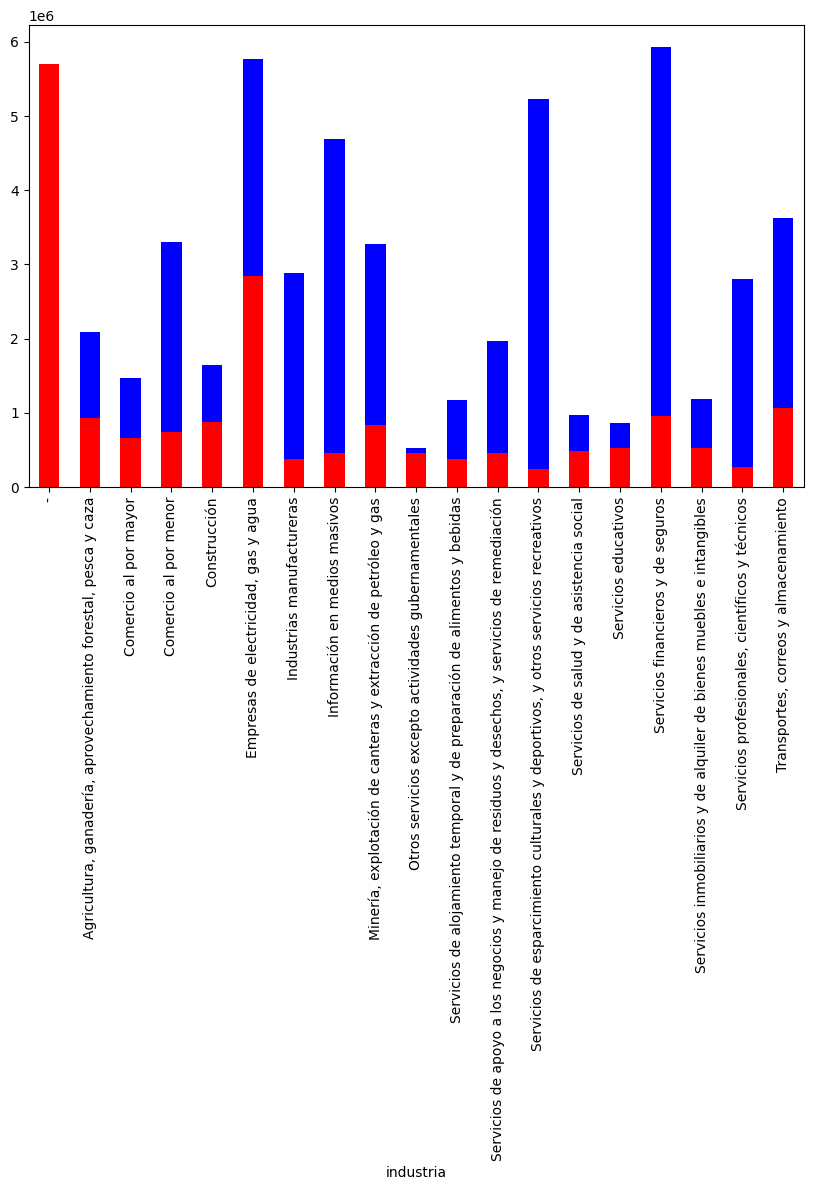

In [437]:
#REALIZAMOS UNA VISUALIZACION DE LA MEDIA Y MEDIANA DEL BOOKVALUE PRO INDUSTRIA

plt.figure(figsize=(10, 6))
industry_des['mean_bvalue'].plot(kind='bar', color='blue')
industry_des['median_bvalue'].plot(kind='bar',color='red')
# Mostrar el gráfico
plt.show()

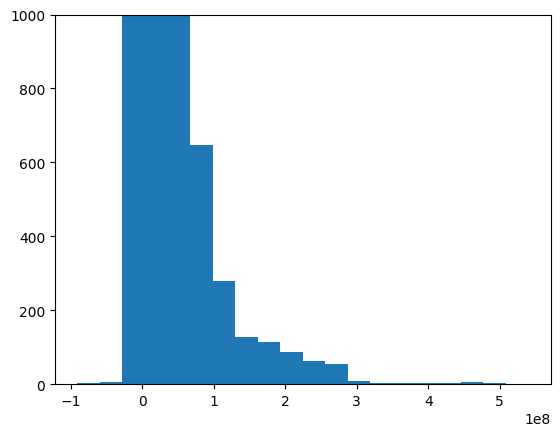

In [461]:
#HISTOGRAMA DEL MARKET VALUE

# REDUJE EL LIMITE EN Y PARA VER EL COMPORTAMIENTO MÁS CLARO Y VER LA TENENCIA A LA IZQUIERDA

plt.hist(data['bookvalue'],bins=20)
plt.ylim(0,1000)
plt.show()

In [471]:
data['bookvalue'].describe()

count    2.408410e+05
mean     2.984094e+06
std      1.246446e+07
min     -9.052000e+07
25%      1.149770e+05
50%      5.407580e+05
75%      1.764300e+06
max      5.398830e+08
Name: bookvalue, dtype: float64

In [469]:
data['bookvalue'][data['bookvalue']<0].count()

12525

AL IGUAL QUE LA VARIABLE MARKET VALUE, AQUI PODEMOS OBSERVAR QUE PARA BOOK VALUE NO EXISTE UNA DISTRIBUCION NORMALIZADA, LA MEDIA DIFIERE MUCHO DE LA MEDIANA Y QUE EXISTE UNA TENDENCIA A LA IZQUIERDA, INFIRIENDO QUE MUY POCAS EMPRESAS TIENEN UN BOOK VALUE GRANDE.

AQUÍ EXISTE UNA DIFERENCIA CON LA OTRA VARIABLE Y ES QUE TIENE VALORES NEGATIVOS Y EN EL HISTOGRAMA SE VE CÓMO ALGUNAS DE LAS EMPRESAS HASTA TIENEN VALORES NEGATIVOS, EXACTAMENTE 12,525

IGUAL QUE LA VARIABLE DE MARKET VALUE, AQUI LA INDUSTRIA CON EL BOOK VALUE MAS GRANDE ES LA DE SERVICIOS DE AGUA, ELECTICIDAD Y LUZ. MIENTRAS QUE LA DE MENOR VALOR ES LA DE SERVICIOS DE ESPARCIMIENTO CULTURAL

#### Which are the biggest 10 US firms in terms of market value and how far they are from the typical size of a US firm?

In [514]:
big_firms = data.groupby(['firm'])[['mvalue']].max()
                                        
b = big_firms.nlargest(10,'mvalue')


print(b.describe())

data['mvalue'].describe()


             mvalue
count  1.000000e+01
mean   1.611601e+09
std    8.202765e+08
min    5.728526e+08
25%    1.017867e+09
50%    1.449940e+09
75%    2.173457e+09
max    3.050896e+09


count    2.341050e+05
mean     8.656292e+06
std      4.285575e+07
min      0.000000e+00
25%      3.230960e+05
50%      1.457001e+06
75%      4.610820e+06
max      3.050896e+09
Name: mvalue, dtype: float64

<Figure size 1000x600 with 0 Axes>

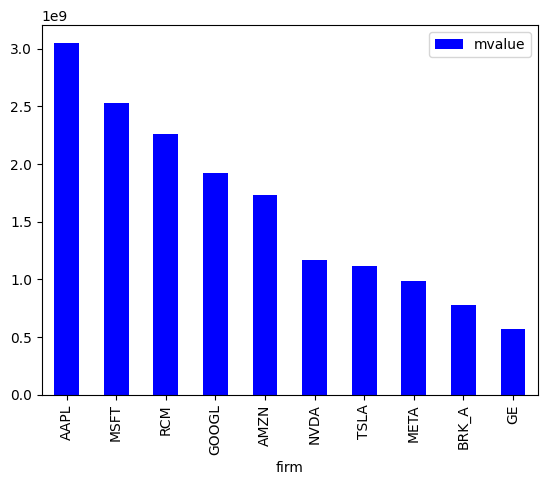

In [513]:
plt.figure(figsize=(10, 6))
b.plot(kind='bar', color='blue')

# Mostrar el gráfico
plt.show()

AQUI PODEMOS OBSERVAR LAS 10 EMPRESAS MAS GRANDES DE US Y PARA CHECAR CUANTO DIFIEREN DEL VALOR TIPICO DE TODAS LAS EMPRESAS TENEMOS QUE SACAR LA DIFERENCIA ENTRE LAS MEDIANAS

In [531]:

allfirms_median = data[['mvalue']].median()


diff = b.median()-allfirms_median


print(diff)

mvalue    1.448483e+09
dtype: float64


PODEMOS OBSERVAR QUE LA DIFERENCIA ES GRANDISIMA ENTRE LAS 10 MEJORES EMPRESAS CONTRA EL RESTO EN MARKET VALUE

#### Which are the biggest 10 US firms in terms of book value and how far they are from the typical size of a US firm?

In [535]:
big_firms = data.groupby(['firm'])[['bookvalue']].max()
                                        
b = big_firms.nlargest(10,'bookvalue')


print(b.describe())

data['bookvalue'].describe()

          bookvalue
count  1.000000e+01
mean   2.627384e+08
std    1.067085e+08
min    1.686020e+08
25%    2.064165e+08
50%    2.203845e+08
75%    2.792745e+08
max    5.398830e+08


count    2.408410e+05
mean     2.984094e+06
std      1.246446e+07
min     -9.052000e+07
25%      1.149770e+05
50%      5.407580e+05
75%      1.764300e+06
max      5.398830e+08
Name: bookvalue, dtype: float64

<Figure size 1000x600 with 0 Axes>

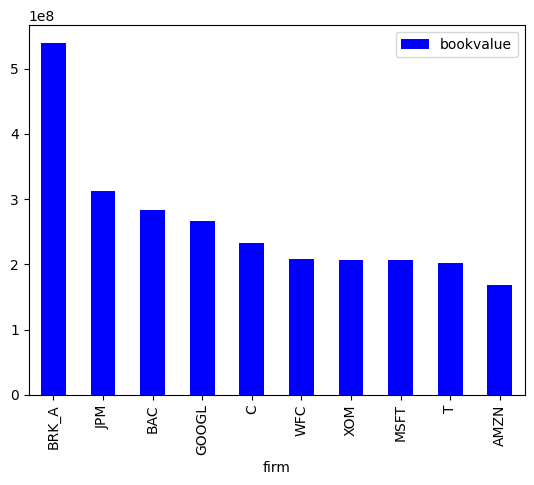

In [536]:
plt.figure(figsize=(10, 6))
b.plot(kind='bar', color='blue')

# Mostrar el gráfico
plt.show()

CON BOOK VALUE PODEMOS OBSERVAR QUE SON OTRAS EMPRESAS DISNTINTAS AL MARKET VALUE Y QUE EL PRIMER PUESTO GANA CON MUCHA DIFERENCIA LAS 9 RESTANTES. 

PARA LA DIFERENCIA ENTRE EL VALOR TIPICO DE LAS 10 MAS GRANDES EMPRESAS EN BOOKVALUE Y EL RESTO, PODEMOS NOTAR QUE NO HAY TANTA DIFERENCIA COMO EN LA DEL MARKET VALUE

In [537]:

allfirms_median = data[['bookvalue']].median()


diff = b.median()-allfirms_median


print(diff)

bookvalue    219843742.0
dtype: float64


### 1.3 Evolution of the US financial market

#### Considering the whole history of financial data for all firms, and only annual fiscal information (selecting fiscalmonth=12) :How the total market value of the US market has changed over the years? Do a table and/or graph and explain

In [559]:

# Filtrar los datos para incluir solo registros con fiscalmonth=12 y empresas de EE. UU.
ydata = data[data['fiscalmonth'] == 12]


market_value_all_year = ydata.groupby(['year'])['mvalue'].sum()


<Axes: xlabel='year'>

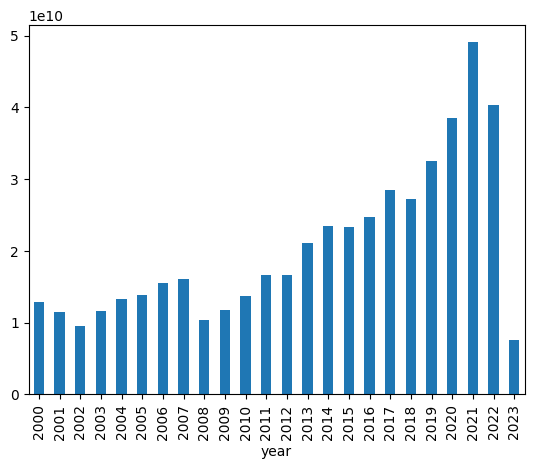

In [560]:
market_value_all_year.plot(kind='bar')

AQUI PODEMOS OBSERVAR COMO SE HA COMPORTADO EL MARKET VALUE DE TODAS LAS EMPRESAS A LO LARGO DE LOS AÑOS. SE VE CLARAMENTE QUE HA HABIDO UN CRECIMIENTO POSITIVO CONTINUO. DONDE SE PUEDE NOTAR QUE HUBO UNA CAIDA ES EN EL AÑO 2007 A 2008 Y EN EL AÑO 2021 A 2022. DE AHI EN FUERA, SOLAMENTE HAN HABIDO CAIDAS MUY PEQUEÑAS PERO GENERALMENTE SIEMPRE SUBEN. EL AÑO 2023 SE VE BAJO PERO ES PORQUE NO TENEMOS TODO LOS DATOS DEL AÑO COMPLETO.

#### How total revenue and total net income of all US firms has changed over the years? Do a table and/or graph and explain

In [562]:
revenue_all_year = ydata.groupby(['year'])['revenue'].sum()
netincome_all_year = ydata.groupby(['year'])['netincome'].sum()


<Axes: xlabel='year'>

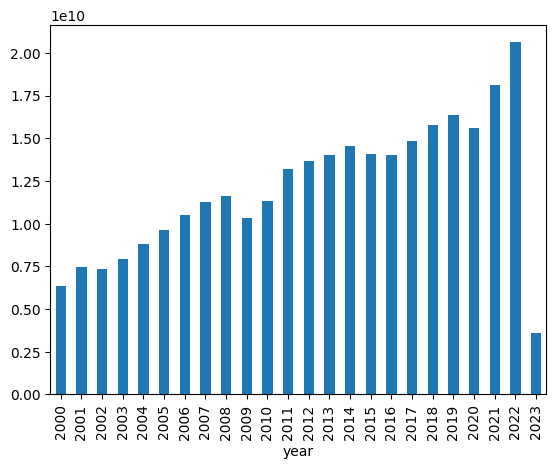

In [564]:
revenue_all_year.plot(kind='bar')

EN LA GRAFICA DE L REVENUE A LO LARGO DE LOS AÑOS MUESTRA UN CRECIMIENTO PERO A DIFERENCIA DEL MARKET VALUE, TIENE UN POCO DE CURVATURA. COMO EL COMPORTAMIENTO DE UN SENO

<Axes: xlabel='year'>

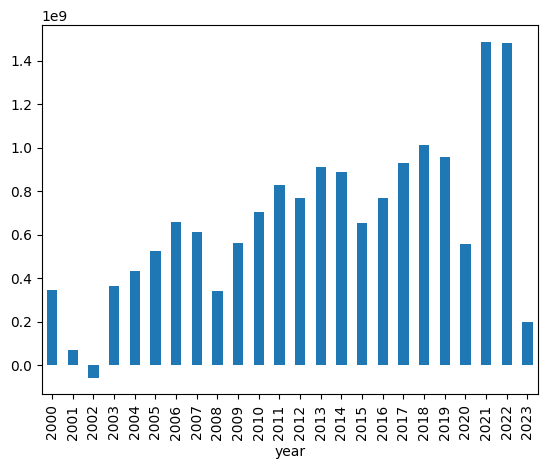

In [565]:
netincome_all_year.plot(kind='bar')

PARA EL NETINCOME SE PUEDE NOTAR UN PATRON DONDE CADA CIERTO TIEMPO EXISTE UNA BAJADA PARA POSTERIORMENTE VOLVER A SUBIR. COMO UNA FUNCION SENO. SIGUIENDO ESTE PATRON PODEMOS ESPERAR QUE ENTRE LOS AÑOS 2024 Y 2026 EXISTA UNA BAJADA EN EL NETINCOME, EL CUAL VUELVA A SUBIR EN 2027.

SIN EMBARGO, DESPUES DEL AÑO 2020 EXISTE UN COMPORTAMIENTO QUE SE SALE MUCHOD DEL PATRON YA QUE EXISTE UNA SUBIDA MUY EXTREMA Y ESO TIENE SENTIDO PORQUE ES EL INICIO DE PERIODO DE PANDEMIA Y AHI EMPEZARON A FLORECER LAS EMPRESAS DIGITALES

### 1.4.1 Descriptive statistics for your industry


#### Using the subsample of your industry and using annual fiscal information (selecting rows with fiscalmonth=12), and the most recent complete year (2022), do the following:

In [575]:
my_industry_year = data[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')]


my_industry_q =data[data['industria']== 'Industrias manufactureras']


#### Show descriptive statistics for future quarterly log return, annual return, total assets, revenue, netincome and all financial ratios calculated above. Provide a clear interpretation of the descriptive statistics of revenue and 1 financial ratio

In [ ]:
#Calculate 1-quarter future log quarterly returns (f1rq)
data['f1rq'] = np.log(data.groupby(['firm'])['adjprice'].shift(-1)) - np.log(data['adjprice'])

#Calculate book value as: bookvalue = totalassets - totalliabilities
data['bookvalue'] = data['totalassets'] - data['totalliabilities']



#### Show a correlation matrix with the same variables you used for descriptive statistics above, but in the case of totalassets, revenue and netincome, use the logarithmic transformation of their values. Which variables have strongest and significant linear relationship with stock returns (annual and quarterly)? Explain

Select 2-3 variables and 2-3 ratios with the strongest correlation with future log quarterly returns and do the following:

#### Do histograms for each factor/variables and interpret them



#### Do plots to visualize the possible relationship each factor might have with quarterly returns (the dependent variable).



#### Design and run a first version of a multiple regression model to examine whether your selected factors can explain/predict quarterly stock returns.



#### You must check for possible multicollinearity problems. Briefly explain what is multicollinearity, run and interpret the corresponding test



#### (optional) For each independent variable (variable/ratio) check if winsorization is needed according to very extreme values. You can check this with the histograms of each variable/ratio. If it is necessary do the corresponding adjustments with winsorization to avoid unreliable results in your regression model

#### Once you corrected your variables/ratios with winsorization (in case you did it) and addressed possible multicollienarity problems, run a final multiple regression model



#### Interpret your model